<a href="https://colab.research.google.com/github/bekonad/10-academy-week2/blob/task-4/Week2_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("reviews_with_analysis.csv")
print(df.head())
print(df.shape)

                                            review  rating        date  \
0                      what is this app problem???       1  2025-06-05   
1     the app is proactive and a good connections.       5  2025-06-05   
2  I cannot send to cbebirr app. through this app.       3  2025-06-05   
3                                             good       4  2025-06-05   
4                                   not functional       1  2025-06-05   

                          bank       source sentiment_label  sentiment_score  \
0  Commercial Bank of Ethiopia  Google Play        NEGATIVE         0.999623   
1  Commercial Bank of Ethiopia  Google Play        POSITIVE         0.999868   
2  Commercial Bank of Ethiopia  Google Play        NEGATIVE         0.995335   
3  Commercial Bank of Ethiopia  Google Play        POSITIVE         0.999816   
4  Commercial Bank of Ethiopia  Google Play        NEGATIVE         0.999779   

  themes  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
(1185, 8

In [ ]:
!pip install pandas matplotlib seaborn wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# Average scores
avg_scores = df.groupby('bank')[['sentiment_score', 'rating']].mean().round(2)
print("\nAverage Scores by Bank:\n", avg_scores)


Average Scores by Bank:
                              sentiment_score  rating
bank                                                
Bank of Abyssinia                       0.97    3.09
Commercial Bank of Ethiopia             0.97    4.19
Dashen Bank                             0.98    4.43


In [ ]:
positive_reviews = df[df['sentiment_label'] == 'POSITIVE']['review'].str.lower()
drivers = positive_reviews[positive_reviews.str.contains('fast|easy|navigation')].head(2).tolist()
negative_reviews = df[df['sentiment_label'] == 'NEGATIVE']['review'].str.lower()
pain_points = negative_reviews[negative_reviews.str.contains('crash|slow|error')].head(2).tolist()
print("Drivers:", drivers)
print("Pain Points:", pain_points)

Drivers: ['it makes life easy!👌', 'nice fast app']
Pain Points: ['i was using this app for the last two years with no problems. it stopped working about 3 months ago. when i tried to transfer funds it gives me error "can\'t do this transaction. inactive account."', 'network errorrrrrr']


In [ ]:
bank_comparison = df.groupby('bank').agg({'sentiment_score': 'mean', 'rating': 'mean'}).reset_index()
print("Bank Comparison:\n", bank_comparison)

Bank Comparison:
                           bank  sentiment_score    rating
0            Bank of Abyssinia         0.966171  3.085213
1  Commercial Bank of Ethiopia         0.971808  4.191214
2                  Dashen Bank         0.984260  4.431078


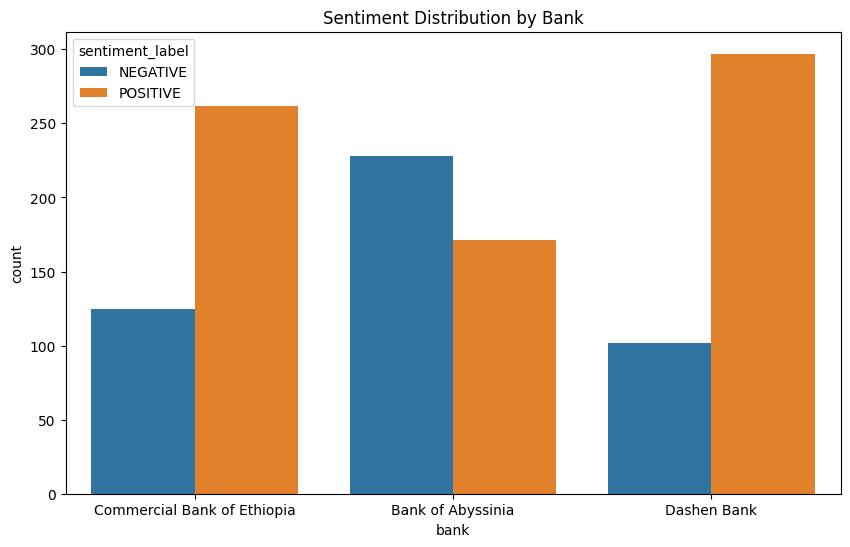

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.savefig('sentiment_distribution.png')
plt.show()

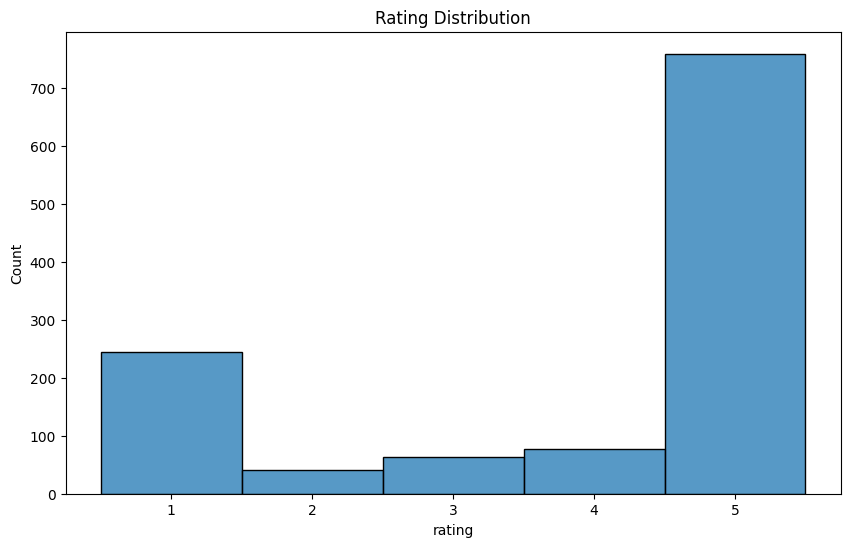

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='rating', bins=5, discrete=True)
plt.title('Rating Distribution')
plt.savefig('rating_distribution.png')
plt.show()

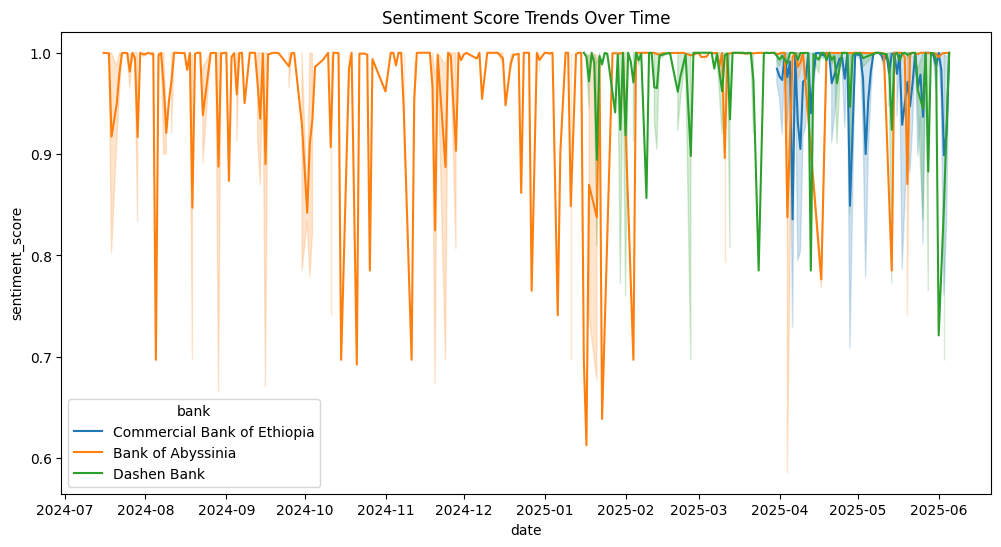

In [ ]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='sentiment_score', hue='bank')
plt.title('Sentiment Score Trends Over Time')
plt.savefig('sentiment_trends.png')
plt.show()

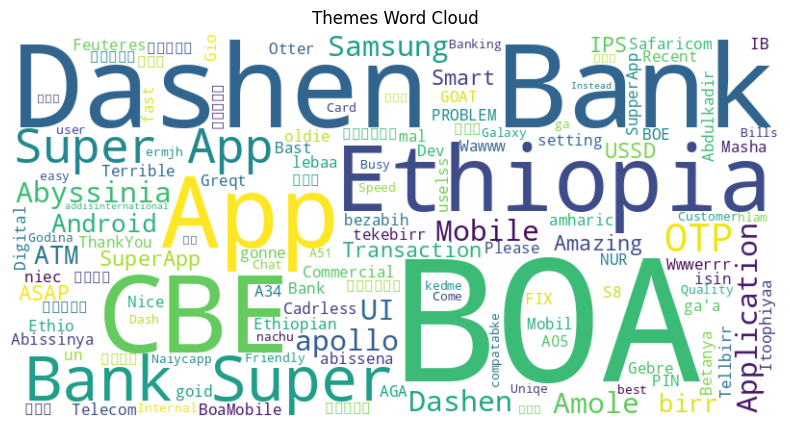

In [ ]:
from wordcloud import WordCloud
all_themes = ' '.join(df['themes'].dropna().str.replace(', ', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_themes)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Themes Word Cloud')
plt.savefig('themes_wordcloud.png')
plt.show()

In [ ]:
from google.colab import files
files.download('sentiment_distribution.png')
files.download('rating_distribution.png')
files.download('sentiment_trends.png')
files.download('themes_wordcloud.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentiment_dist = df['sentiment_label'].value_counts(normalize=True).round(3)
ethical_note = "Potential bias: Negative reviews may dominate as users are more likely to report issues than positive experiences. Google Play Store data may not represent all users (Android-only)."
print("Sentiment Distribution:\n", sentiment_dist)
print("\nEthical Note:\n", ethical_note)

Sentiment Distribution:
 sentiment_label
POSITIVE    0.616
NEGATIVE    0.384
Name: proportion, dtype: float64

Ethical Note:
 Potential bias: Negative reviews may dominate as users are more likely to report issues than positive experiences. Google Play Store data may not represent all users (Android-only).


In [ ]:
suggestions = [
    "Optimize app performance to reduce crashes and slow loading",
    "Enhance user interface for easier navigation",
    "Improve customer support response time"
]
print("\nSuggestions:\n", suggestions)


Suggestions:
 ['Optimize app performance to reduce crashes and slow loading', 'Enhance user interface for easier navigation', 'Improve customer support response time']
